In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import quandl

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("Foreign_Exchange_Rates.csv")
idx = pd.read_csv("w_sp500_index.csv")
rates = pd.read_csv("treasury_rates.csv")

In [3]:
df.keys()

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [4]:
idx.keys()

Index(['Date', 'S&P_close', 'MEX_close', 'VIX_close'], dtype='object')

In [5]:
rates.keys()

Index(['Date', '1 Mo', '3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr',
       '10 Yr', '20 Yr'],
      dtype='object')

In [10]:
df = df.drop(columns=["Unnamed: 0", "NEW ZEALAND - NEW ZELAND DOLLAR/US$", "BRAZIL - REAL/US$", "HONG KONG - HONG KONG DOLLAR/US$", "KOREA - WON/US$", "SOUTH AFRICA - RAND/US$","SINGAPORE - SINGAPORE DOLLAR/US$","DENMARK - DANISH KRONE/US$","MALAYSIA - RINGGIT/US$","NORWAY - NORWEGIAN KRONE/US$","SWEDEN - KRONA/US$","SRI LANKA - SRI LANKAN RUPEE/US$","TAIWAN - NEW TAIWAN DOLLAR/US$","THAILAND - BAHT/US$"])
newColumnsNames = list(map(lambda c: c.split(" - ")[0] if "-" in c else "DATE", df.columns))
newColumnsNames
df.columns = newColumnsNames
df.head()

,DATE,AUSTRALIA,EURO AREA,UNITED KINGDOM,CANADA,CHINA,INDIA,MEXICO,JAPAN,SWITZERLAND
0,2000-01-03,1.5172,0.9847,0.6146,1.4465,8.2798,43.55,9.4015,101.7,1.5808
1,2000-01-04,1.5239,0.97,0.6109,1.4518,8.2799,43.55,9.457,103.09,1.5565
2,2000-01-05,1.5267,0.9676,0.6092,1.4518,8.2798,43.55,9.535,103.77,1.5526
3,2000-01-06,1.5291,0.9686,0.607,1.4571,8.2797,43.55,9.567,105.19,1.554
4,2000-01-07,1.5272,0.9714,0.6104,1.4505,8.2794,43.55,9.52,105.17,1.5623


In [7]:
df = df.replace("ND", np.nan)
df = df.bfill().ffill() 

# Make date wise indexing 

df = df.set_index("DATE")
df.index = pd.to_datetime(df.index)
df = df.astype(float)

In [8]:
print("Total number of records", len(df))
print("Total number of days between {} and {} are {}".format(df.index.min().date(), df.index.max().date(), (df.index.max() - df.index.min()).days+1))

Total number of records 5217
Total number of days between 2000-01-03 and 2019-12-31 are 7303


In [10]:
df.describe()

,AUSTRALIA,EURO AREA,UNITED KINGDOM,CANADA,CHINA,INDIA,MEXICO,JAPAN,SWITZERLAND
count,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000,5217.000000
mean,1.332299,0.844089,0.640755,1.230588,7.199305,52.764420,13.209003,106.594604,1.150131
std,0.269829,0.126712,0.082651,0.182145,0.819861,9.697379,3.327821,13.224120,0.248850
min,0.906900,0.624600,0.473800,0.916800,6.040200,38.480000,8.946000,75.720000,0.729600
25%,1.115600,0.751200,0.587900,1.056000,6.475800,45.270000,10.802000,100.100000,0.966800
50%,1.311500,0.815800,0.636600,1.237200,6.859100,48.110000,12.480000,109.060000,1.038600
75%,1.430200,0.900400,0.692500,1.335700,8.276500,62.470000,14.751500,116.830000,1.268800
max,2.071300,1.209200,0.828700,1.612800,8.280000,74.330000,21.891000,134.770000,1.825000


In [11]:
# Prepare a full dataframe
num_records = 7303
data = {}
data["DATE"] = pd.date_range("2000-01-03", "2019-12-31", freq="D")

complete = pd.DataFrame(data=data)
complete = complete.set_index("DATE")
complete = complete.merge(df, left_index=True, right_index=True, how="left")
complete = complete.bfill().ffill()

In [12]:
complete.head()

,AUSTRALIA,EURO AREA,UNITED KINGDOM,CANADA,CHINA,INDIA,MEXICO,JAPAN,SWITZERLAND
DATE,,,,,,,,,
2000-01-03,1.5172,0.9847,0.6146,1.4465,8.2798,43.55,9.4015,101.70,1.5808
2000-01-04,1.5239,0.9700,0.6109,1.4518,8.2799,43.55,9.4570,103.09,1.5565
2000-01-05,1.5267,0.9676,0.6092,1.4518,8.2798,43.55,9.5350,103.77,1.5526
2000-01-06,1.5291,0.9686,0.6070,1.4571,8.2797,43.55,9.5670,105.19,1.5540
2000-01-07,1.5272,0.9714,0.6104,1.4505,8.2794,43.55,9.5200,105.17,1.5623


/Users/brendanganji/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


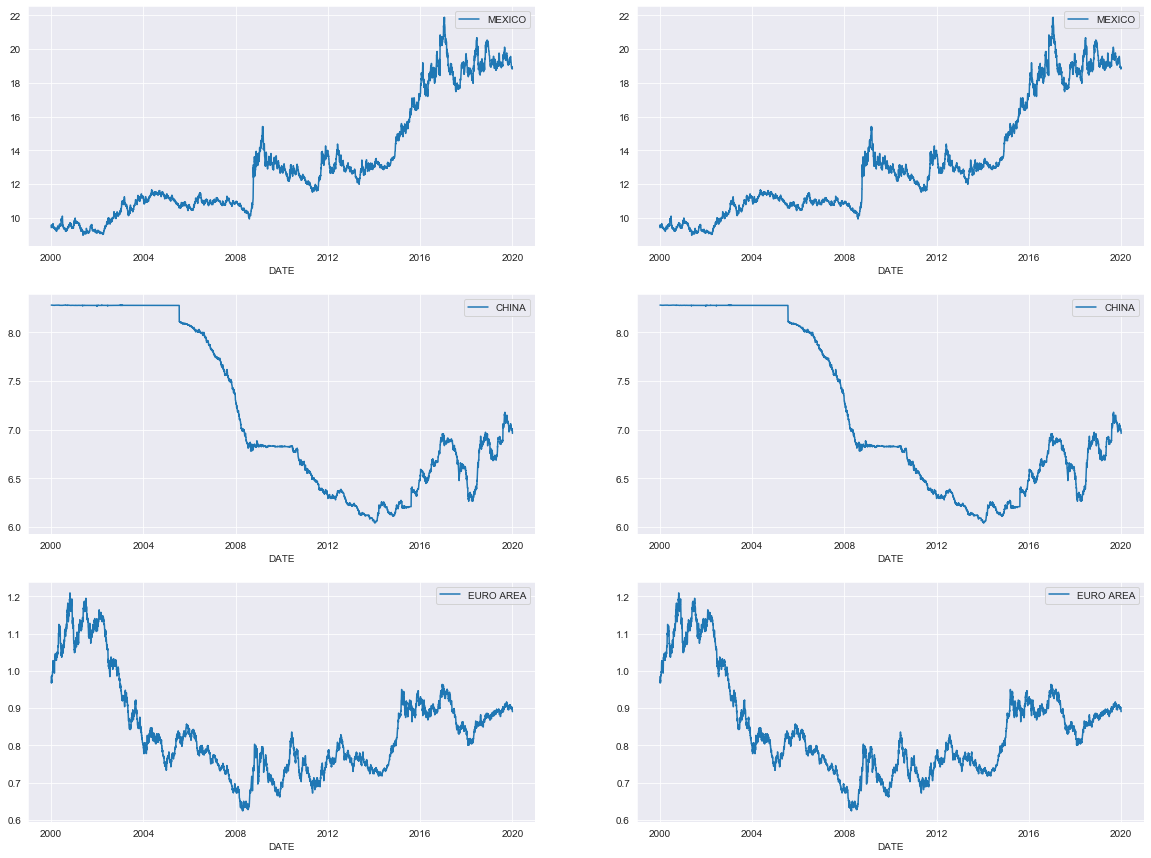

In [13]:
#Inspecting data to ensure it is close enough to original dataset.
toInspect = ["MEXICO", "CHINA", "EURO AREA"]
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(20,rows*5))

for row in range(rows):
    sns.lineplot(data=df[[toInspect[row]]], ax=ax[row][0])
    sns.lineplot(data=complete[[toInspect[row]]], ax=ax[row][1])

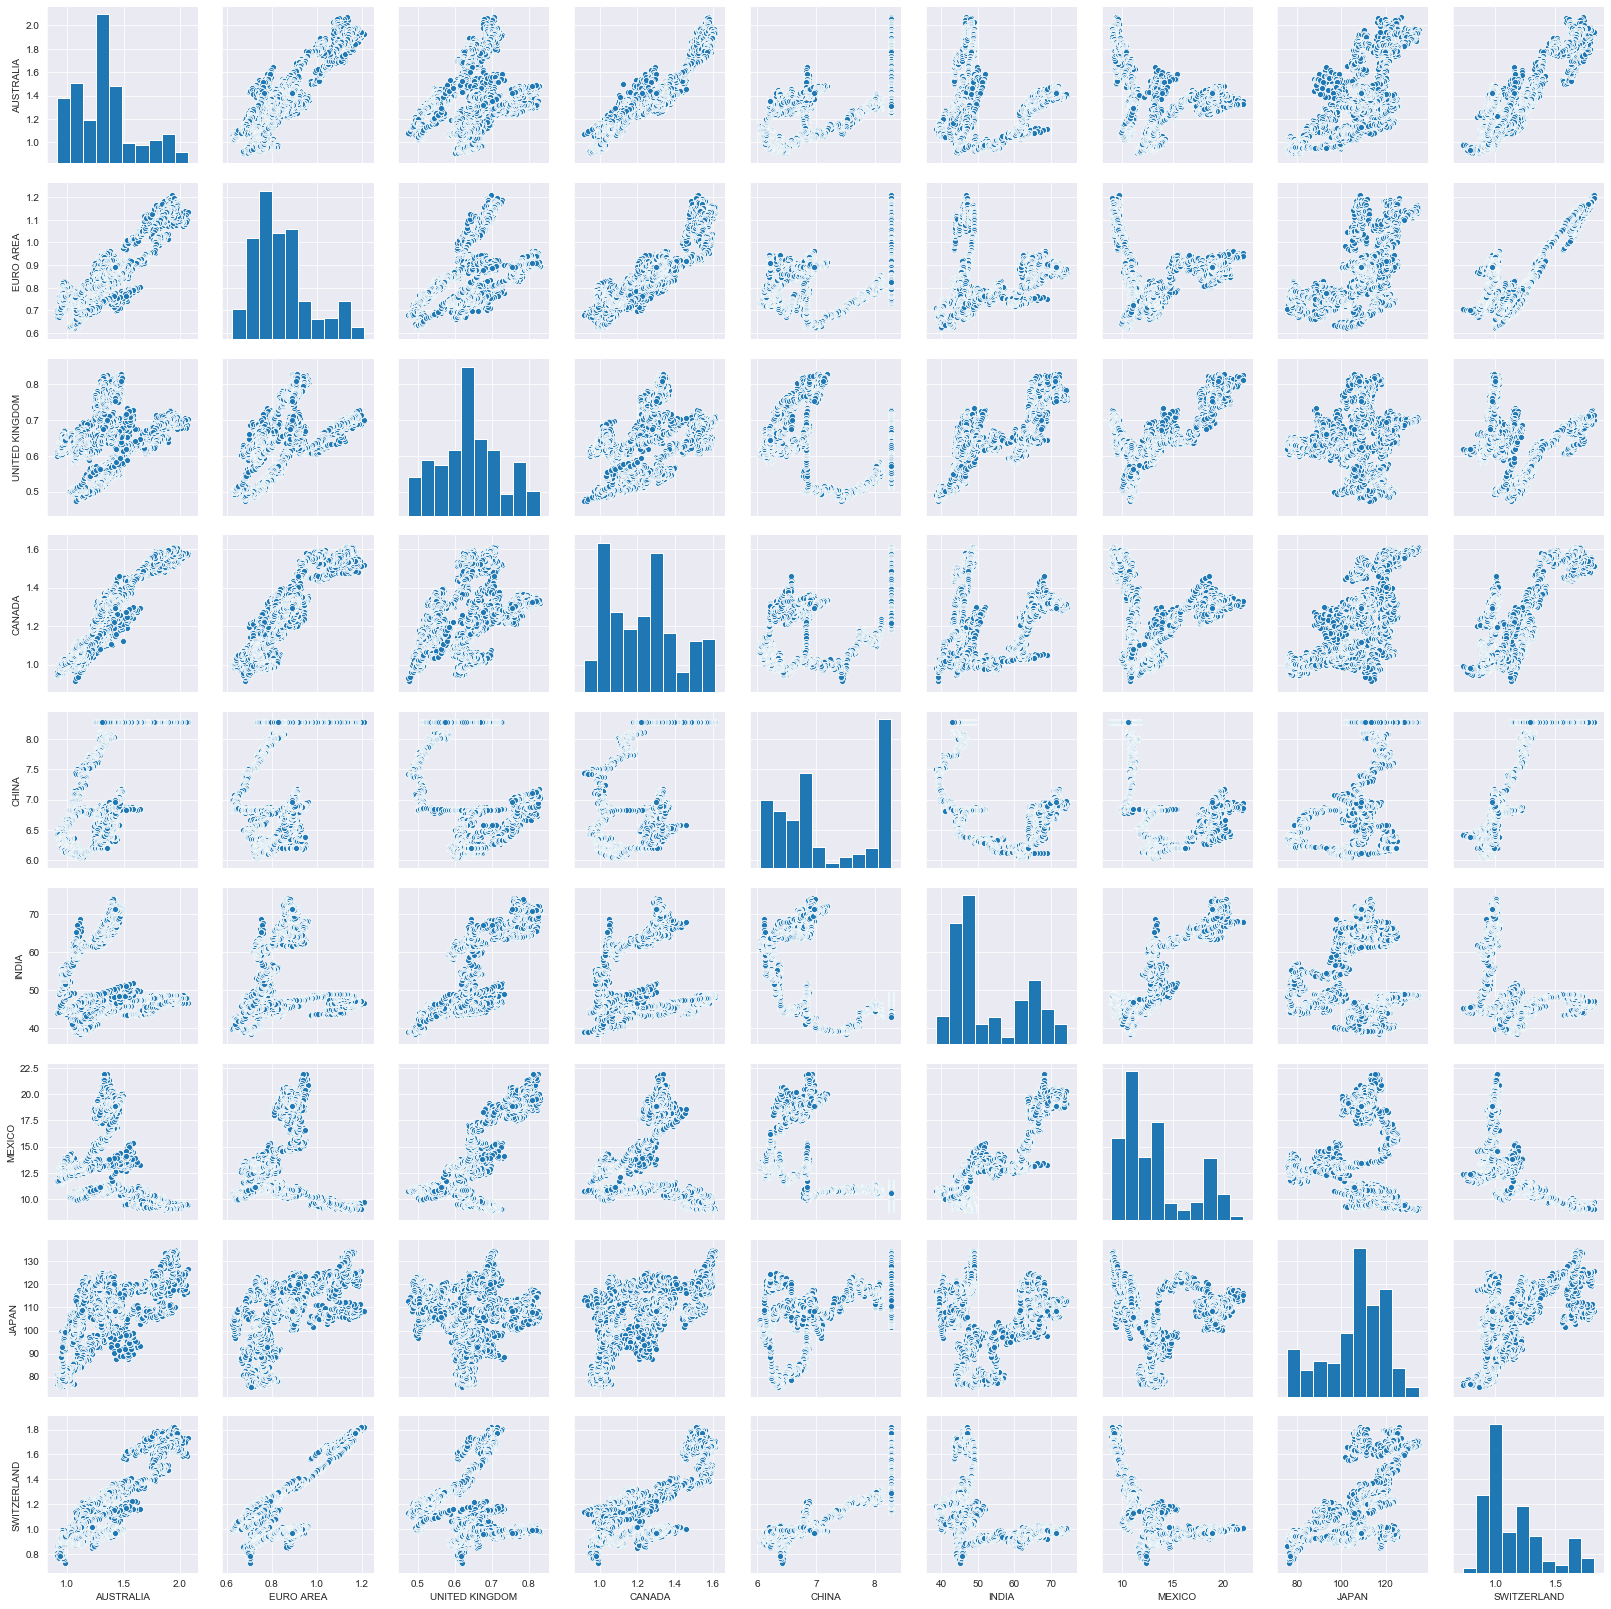

In [14]:
sns.pairplot(complete)

/Users/brendanganji/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brendanganji/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


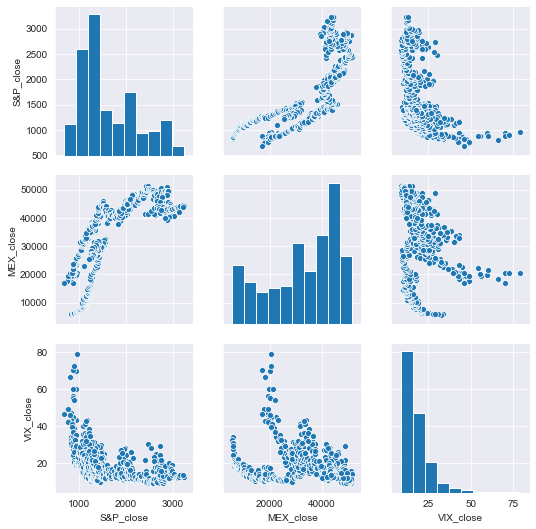

In [15]:
sns.pairplot(idx)